In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import Layout, Button, Box, VBox,Label
import plotly as ply
from dance_sim_tools import trace_objects,utility
from dance_sim_tools.utility import histogram_draw_to_parameters as htp
from dance_sim_tools.ipywidget_helpers import slider
import pandas as pd
import dance_sim_tools.trace_objects as trace_objects
import warnings
warnings.filterwarnings('ignore')
import scipy.stats
import matplotlib.gridspec

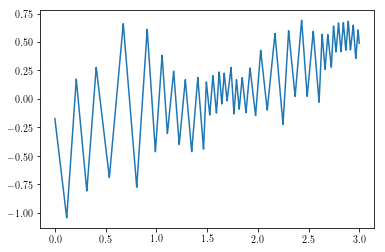

In [23]:
#Test the ird trace by time

num_segments = 70

ks = np.random.normal(1,0.2,num_segments)

ird0 = np.radians(70)
irds = np.zeros_like(ks)
irds[0] = ird0

for i in range(1,len(ks)):
    irds[i] = ks[i-1]*irds[i-1]

r_0 = np.radians(50)
velocity = np.radians(10)
last_food_loc = np.radians(-10)

trace = trace_objects.DistanceListTrace(
        last_food_loc,irds,r_0,velocity=velocity)


plt.figure()
plt.plot(trace.t,trace.path)
plt.show()

## Single Trace, One Parameter

Below: we generate a single straight line trace according to the 
inter-reversal distance relationship:
$$r_{i} = kr_{i-1}$$

In [24]:
def g(k_mean,n_bins=40,r_0=50,food1_loc=-15,velocity=10,t_stop=4.):
   
    r_0 = np.radians(r_0)
    velocity = np.radians(velocity)
    food1_loc = np.radians(food1_loc)

    #We're plotting the relevant crossing lines for a single transit bin,
    #the bin whose lower edge is given by theta_0.
    
    #Make the trace
    num_segments = 70

    ks = np.random.normal(k_mean,0.2,num_segments)

    ird0 = np.radians(70)
    irds = np.zeros_like(ks)
    irds[0] = ird0

    for i in range(1,len(ks)):
        irds[i] = ks[i-1]*irds[i-1]



    trace = trace_objects.DistanceListTrace(
            food1_loc,irds,r_0,t_stop=t_stop,
                velocity=velocity,num_transit_ticks=n_bins)
    
    
    transit_tick_interval = 2*np.pi/n_bins
    
    x = trace.t
#    y = (trace.path-np.pi)%(2*np.pi) 
    y = trace.path
    
    fig = plt.figure(1,figsize=(15,15))#,dpi=200)
    ax1 = plt.subplot(221)
   

    plt.plot(x,y,'o',color='grey',markersize=1,zorder=1)
    plt.rc('text', usetex=True)
    plt.xlabel('Time (min)')
   

    num_ytick_labels = 5
    yticks = np.linspace(-np.pi,np.pi,num_ytick_labels)
    plt.yticks(yticks)
    y_ticklabels = '$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$'
    ax1.set_yticklabels(y_ticklabels,fontsize=15)

    
 #   reversals_inds = trace.find_reversal_inds()
#     plt.scatter(x[reversal_inds],(y%(2*np.pi))[reversal_inds],color='k',zorder=2)
       
       
#     print('scatter:\n'+str(np.sort(y[reversal_inds])))

 #   t_stop = T1+T2   
    plt.ylim([-np.pi,np.pi])
    
    reversals_inds,reversals_bin_counts = trace.find_reversals_peaks()
    reversals_inds,reversals_bin_counts = trace.find_reversal_inds()

   # plt.scatter(x[reversal_inds],y[reversal_inds],color='k',zorder=2)
    plt.scatter(x[reversals_inds],y[reversals_inds],color='b',zorder=2)
    
    #Plot the projections of the reversals onto the right y axis
    
    left_dots = np.vstack((x[reversals_inds],y[reversals_inds]))
    right_dots = np.vstack((t_stop*np.ones_like(x[reversals_inds]),y[reversals_inds]))
    #shape outer_dots is (2,num_spots)
    whole = np.stack((left_dots,right_dots))
    #shape whole is (2,2,num_spots)
    plt.plot(whole[:,0,:],whole[:,1,:],color='pink',zorder=0);
    #The main takeaway is to make one big array whose dimensions are
    #2 (inner vs outer ) by
    #2 (x and y) by
    #num angles
    
#     print((180./num_transit_ticks))
    
    ax2 = plt.subplot(222)
    y = trace.location_bins_rads
    ax2.barh(y[:-1],reversals_bin_counts,height=(2*np.pi/n_bins),align='edge',
             color='r',
             label='reversals')
    ax2.set_yticks(y)
#     ax2.set_yticklabels(np.round(np.degrees(y),0).astype(int))
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
#         left=False,      # ticks along the bottom edge are off
        labelleft=False) # labels along the bottom edge are off
    
    plt.title('Reversal Counts')
    
    plt.ylim([-np.pi,np.pi])
    
    x_locs = -0.05*np.ones(num_ytick_labels);y_locs = np.linspace(0.,1.,num_ytick_labels)
    for x_loc,y_loc,label in zip(x_locs,y_locs,y_ticklabels):
        ax2.text(x_loc,y_loc,label,transform=ax2.transAxes,
                 horizontalalignment='right',fontsize=15)
        
    
#     for i,label in enumerate(ax2.yaxis.get_ticklabels()):
#         if i%5>0:
#             label.set_visible(False)
    
#     print('bin vals:\n'+str(y[:-1][reversals_bin_counts>0]))

    #plt.legend()

  #  print(np.sum(reversals_bin_counts),len(reversals_inds))
    
    ax4 = plt.subplot(223,polar=True)
#   path = np.interp(trace.t, trace.reversal_times, trace.reversal_thetas[:-1])
    plt.plot(trace.path,trace.t)
    ax4.set_theta_zero_location('S', offset=0)
    tick_degree_values = np.linspace(0,360-(360/n_bins),n_bins)
    ax4.set_xticks(np.radians(tick_degree_values))
    pt1 =  np.linspace(0,180-(360/n_bins),n_bins/2).astype(int)
    pt2 =  np.linspace(-180,0-(360/n_bins),n_bins/2).astype(int)
    xticklabels=ax4.set_xticklabels(np.hstack((pt1,pt2)))
    
    ax4.set_yticklabels([])
    
    
#     plt.xticks(np.linspace(np.pi/2,2*np.pi,4),y_ticklabels)
#

    

In [25]:
    
n_bins_init = 24
sn_bins = slider('n_bins',0,50,2,n_bins_init)

k_mean_init =  1. 
sk_mean =  slider('k_mean',.9,1.2,0.01,k_mean_init)


r_0_init = -50.
sr_0 = slider('r_0',10.,90.,5.,r_0_init)
velocity_init = 5.
svelocity = slider('velocity',0.,20.,.1,velocity_init)
t_stop_init = 4.
st_stop = slider('t_stop',0.,10.,.1,t_stop_init)
food1_loc_init = -30.
sfood1_loc = slider('food1_loc',-90.,90,10.,food1_loc_init)

sliders = [sk_mean,sn_bins,sr_0,svelocity,st_stop,sfood1_loc]

items = [Box([slider]) for slider in sliders]
#         [snum_transit_ticks]),Box([sk_mean])]
  

ui = Box(items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))

slider_names = [slider.description for slider in sliders]
param_dict =  dict(zip(slider_names,sliders))

out = widgets.interactive_output(g, param_dict)

def reset_values(b):
    """Reset slider values"""
    sk_mean.set_trait('value',k_mean_init)
    snum_transit_ticks
    
reset_button = widgets.Button(description = "Reset")
reset_button.on_click(reset_values)


display(ui,reset_button,out)



# my_plts = widgets.interactive(pltsin, f1 = (1, 2, 0.01), f2 = (1, 2, 0.01))
# display(my_plts, reset_button)

Box(children=(Box(children=(FloatSlider(value=1.0, continuous_update=False, description='k_mean', max=1.2, min…

Button(description='Reset', style=ButtonStyle())

Output()

## First Two Reversals (Repeated Draws)

Now do a new version of the above, except focusing in on the first two reversals.
Look at how the multi-trial histogram of reversal locations is modulated by the distribution of c-values and k-values.

Up soon: expand this analysis to past the first two reversals.

In [26]:
#We want sliders that can control the mean and standard deviation of k_1,k_1c

def g(k_1_mean,k_1_std,k_1c_mean,k_1c_std,num_draws=int(1e6),
          n_bins=40,r_0=50,food1_loc=-15,velocity=10,t_stop=4.,condition=0):
   
    r_0 = np.radians(r_0)
    velocity = np.radians(velocity)
    food1_loc = np.radians(food1_loc)
    k_1c_mean = np.radians(k_1c_mean) 
    k_1c_std =  np.radians(k_1c_std)
    
    
    #We don't need to use the trace objects. Since the only thing we're interested in is the 
    #first two inter reversal distances (for the given starting location),
    #we can just directly compute this.
    
    k_1s = np.random.normal(k_1_mean,k_1_std,num_draws)
    k_1cs = np.random.normal(k_1c_mean,k_1c_std,num_draws)  
    
    fig = plt.figure(1,figsize=(10,10))#,dpi=200)
    
    
    #First plot will show the distribution of k_1s (both pdf and histgram of drawn values)
    ax1 = plt.subplot(221)
    plot1_xmin, plot1_xmax = -3,5  
    k_1_bins = np.linspace(plot1_xmin,plot1_xmax,n_bins)
    k_1s_counts,_ = np.histogram(k_1s,bins=k_1_bins)
    plt.step(k_1_bins,np.hstack((np.array([0,]),k_1s_counts)))     
#     plt.bar(k_1_bins[:-1],k_1s_counts)
    plt.title('Distribution of k1')
    
    
    #Second plot will show the distribution of k_1cs (both pdf and histogram of drawn values)
    ax2 = plt.subplot(222)
    plot2_xmin, plot2_xmax = 0,180
#     k_1c_bins = np.linspace(plot2_xmin,plot2_xmax,n_bins)
    k_1cs = np.degrees(k_1cs)
    k_1c_bins = np.linspace(plot2_xmin, plot2_xmax,n_bins)
    k_1c_counts,_ = np.histogram(k_1cs,bins=k_1c_bins)
    plt.step(k_1c_bins,np.hstack((np.array([0,]),k_1c_counts)))     
    plt.title('Distribution of c')
    plt.xticks(np.linspace(0,180,7))
    
    #Compute the distribution of r_1s we obtain if r_1 is given by 
    #r_1 = k_1r_0+k_1c
    #where
    #k_1 ~ N(k_1_mean,k_1_std)
    #k_1c ~ N(k_1c_mean,k_1c_std)
    #r_0 from the data (draw from the empirical distribution)
    
#     r_0s = np.random.normal(r_0,10.,len(k_1cs)) #temporary -- should be empirical

    filename = 'r_0andr_1/r_0_'+str(condition)+'.txt'
    
    empirical_r0s = pd.read_csv(filename).values#, header=None, usecols=[2])

    
    #Shuffle/redraw from the empirical r_0s
    ax4 = plt.subplot(224)
    xmin, xmax = 0,180
    small_bins = np.linspace(xmin,xmax,20)    
    bin_width = small_bins[1] - small_bins[0] 
    emp_r0_bin_counts,_ = np.histogram(np.degrees(empirical_r0s),bins=small_bins)    
    plt.step(small_bins,np.hstack((np.array([0]),emp_r0_bin_counts)),'blue',label='redraw')
    plt.legend()
  
    
    
    plt.hist(np.degrees(empirical_r0s),bins=20)
    
    
    
    plt.xticks(np.linspace(0,180,7))
    plt.title('Empirical r0 values')
    plt.xlabel('r0 (deg)')
    plt.ylabel('Freq')
    
    bin_counts,_ = np.histogram(np.degrees(empirical_r0s),bins=small_bins)
    normed_bin_counts = bin_counts.astype(float)/(np.sum(bin_counts))
    
    num_r0_draws = len(k_1cs)
    
    
    empirical_r0_draws = np.random.choice(
        small_bins[:-1]+0.5*bin_width, #set of values to draw from
        p=normed_bin_counts, #corresponding probabilities
        size=num_r0_draws #number of values to draw
        ) 


    r_1s = k_1s*empirical_r0_draws+k_1cs
#     r_1s = k_1s*r_0s+k_1cs  
    
    #Third, a histogram of r_1.
    ax3 = plt.subplot(223)
    
    plot3_xmin, plot3_xmax = 0,180  
    r_1_bins = np.linspace(plot3_xmin,plot3_xmax,n_bins)
    r_1_bin_counts,_ = np.histogram(r_1s,bins=r_1_bins)
 
    r_1_bin_counts = r_1_bin_counts/np.max(r_1_bin_counts)
    
    plt.step(r_1_bins,np.hstack((np.array([0]),r_1_bin_counts)))
#     ax3.set_xticks(r_1_bins)
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
#         left=False,      # ticks along the bottom edge are off
        labeltop=False) # labels along the top edge are off
    plt.title('r1 values')
    
    #On this same plot, plot the empirical r_1s.
    filename = 'r_0andr_1/r_1_'+str(condition)+'.txt'
    
    empirical_r1 = pd.read_csv(filename).values#, header=None, usecols=[2])
    emp_r1_bin_counts,_ = np.histogram(np.degrees(empirical_r1),bins=small_bins)
    emp_r1_bin_counts = emp_r1_bin_counts/np.max(emp_r1_bin_counts)
    plt.step(small_bins,np.hstack((np.array([0]),emp_r1_bin_counts)),'r',label='empirical r1s')
    plt.legend()
    
    plt.xticks(np.linspace(0,180,7))
    
k_1_mean_init =  1. 
sk_1_mean =  slider('k_1_mean',.9,1.2,0.01,k_mean_init)

k_1_std_init =  .2 
sk_1_std =  slider('k_1_std',.05,2.,0.01,k_1_std_init)

k_1c_mean_init =  30. 
sk_1c_mean =  slider('k_1c_mean',10.,80.,1.,k_1c_mean_init)

k_1c_std_init =  5. 
sk_1c_std =  slider('k_1c_std',1.,20.,1.,k_1c_std_init)


n_bins_init = 200
sn_bins = slider('n_bins',0,500,20,n_bins_init)


r_0_init = -50.
sr_0 = slider('r_0',10.,90.,5.,r_0_init)
velocity_init = 5.
svelocity = slider('velocity',0.,20.,.1,velocity_init)
t_stop_init = 4.
st_stop = slider('t_stop',0.,10.,.1,t_stop_init)
food1_loc_init = -30.
sfood1_loc = slider('food1_loc',-90.,90,10.,food1_loc_init)


condition_toggle = widgets.RadioButtons(options=[('1F',1), ('2F 60',2),
                                          ('2F 90',3)],disabled=False,description='condition')                                 



sliders = [sk_1_mean,sk_1_std, sk_1c_mean, 
           sk_1c_std, sn_bins,sr_0,svelocity,st_stop,sfood1_loc,condition_toggle]

items = [Box([slider]) for slider in sliders]
#         [snum_transit_ticks]),Box([sk_mean])]
  

ui = Box(items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))

slider_names = [slider.description for slider in sliders]
param_dict =  dict(zip(slider_names,sliders))

out = widgets.interactive_output(g, param_dict)

def reset_values(b):
    """Reset slider values"""
    sk_mean.set_trait('value',k_mean_init)
    snum_transit_ticks
    
reset_button = widgets.Button(description = "Reset")
reset_button.on_click(reset_values)


display(ui,reset_button,out)


Box(children=(Box(children=(FloatSlider(value=1.0, continuous_update=False, description='k_1_mean', max=1.2, m…

Button(description='Reset', style=ButtonStyle())

Output()

Now do bootstrapping to examining how overlapping the k,c values are between conditions.

In [36]:
#Pull up all of the r_1 and r_0 for each three conditions 

#we collect all the ks and the cs for each of the 3 conditions

def zero_insert(a):
    return np.hstack((np.array([0]),a))

def g(m,logN,n_bins):

    n_bins = int(n_bins)
#     m = 5     #Set a subsample size m out of all the flies in the condition
    m = int(m)
    N = int(np.exp(logN))
    ks = np.full((3,N),np.nan)
    cs = np.full((3,N),np.nan)
    fit_errs = np.full((3,N),np.nan)


    for condition in [1,2,3]:

        r_0_filename = 'r_0andr_1/r_0_'+str(condition)+'.txt'    
        empirical_r0s = pd.read_csv(r_0_filename).values.T[0]#, header=None, usecols=[2])

        r_1_filename = 'r_0andr_1/r_1_'+str(condition)+'.txt'    
        empirical_r1s = pd.read_csv(r_1_filename).values.T[0]#, header=None, usecols=[2])

        #For N iterations, draw m pairs of r_1,r_0, and compute a least squares fit for k,c using only the subsample
        for i in range(N):
            #randomly select m r_1,r_0 pairs from all r_1s,r_0s for the condition
            #draw m of r_1
            r_1_draw_idx = np.arange(len(empirical_r1s))
            np.random.shuffle(r_1_draw_idx)
            r_1_draw = empirical_r1s[r_1_draw_idx[:m]]
            #Find the r_0 with the same index (=fly index) as those drawn above
            r_0_draw = empirical_r0s[r_1_draw_idx[:m]]

            #Compute a least squares fit for k,c using only the subsample
            #Idea is that r_1 = k*r_0 + c
            #So fit a 2-constant linear regression w/ input r_0 and output r_1
    #         print(r_1_draw,r_0_draw)
            k, c, r_value, p_value, std_err = scipy.stats.linregress(r_0_draw,r_1_draw)
    #         print(k)
            ks[condition-1,i] = k
            cs[condition-1,i] = c
            fit_errs[condition-1,i] = std_err

#     fit_errs = np.degrees(fit_errs)

    #Plot the distribution of ks (plot 1) and cs (plot 2) from all k iterations for each condition
        
    colors = ['blue','orange','red']

    kmin,kmax = -0,3 
    plt.figure(figsize=(12,12))
 
    alpha = 0.1
    
    cs = np.degrees(cs)

    ax1 = plt.subplot(221)
    kbins = np.linspace(kmin,kmax,n_bins)
    n,_,_=plt.hist(ks[0,:],bins=kbins,label='1F',alpha=alpha,color=colors[0])
    plt.step(kbins,zero_insert(n),color=colors[0])
    n_k,_,_=plt.hist(ks[1,:],bins=kbins,label='2F60',alpha=alpha,color=colors[1])
    plt.step(kbins,zero_insert(n_k),color=colors[1])
    n,_,_=plt.hist(ks[2,:],bins=kbins,label='2F90',alpha=alpha,color=colors[2])
    plt.step(kbins,zero_insert(n),color=colors[2])
    plt.xticks(np.arange(kmin,kmax,0.5))
    plt.xlim([kmin,kmax])
    plt.title('Ks')
    plt.legend()
    
    
    #investigate what's happening with the second peak of k values in the 2F case
    second_bump_range = [1.5,2.5]
    ks_in_range_inds = (ks[1,:]>second_bump_range[0])&(ks[1,:]<second_bump_range[1])

    #do the other bump for comparison
    first_bump_range = [0.8,1.2]
    ks_in_range1_inds = (ks[1,:]>first_bump_range[0])&(ks[1,:]<first_bump_range[1])

    
    

    cmin,cmax = -50,180
    ax2 = plt.subplot(222)
    cbins = np.linspace(cmin,cmax,n_bins)
    n,_,_=plt.hist(cs[0,:],bins=cbins,label='1F',alpha=alpha,color=colors[0])
    plt.step(cbins,zero_insert(n),color=colors[0])
    n_c,_,_=plt.hist(cs[1,:],bins=cbins,label='2F60',alpha=alpha,color=colors[1])
    plt.step(cbins,zero_insert(n_c),color=colors[1])
    n,_,_=plt.hist(cs[2,:],bins=cbins,label='2F90',alpha=alpha,color=colors[2])
    plt.step(cbins,zero_insert(n),color=colors[2])


#     plt.xticks(np.arange(cmin,cmax,10))
    plt.title('Cs')
    plt.legend()

    
    #plot the values of cs in the 2F case where the second k peak is
    bin_inds = np.digitize(cs[1,ks_in_range_inds],cbins)
    to_plot_y = n_c[bin_inds]
#     to_plot_x = cbins[bin_inds]
    to_plot_x = cs[1,ks_in_range_inds]+(cbins[1]-cbins[0])/2
    plt.plot(to_plot_x,to_plot_y,'o',color='teal',alpha=alpha)
    #Show the k's the c's match to
    bin_inds = np.digitize(ks[1,ks_in_range_inds],kbins)
    to_plot_y = n_k[bin_inds]
    #to_plot_x = kbins[bin_inds]
    to_plot_x = ks[1,ks_in_range_inds]+(kbins[1]-kbins[0])/2
    ax1.plot(to_plot_x,to_plot_y,'o',color='teal',alpha=alpha)
    
    
    #do the above for the first peak
    bin_inds= np.digitize(cs[1,ks_in_range1_inds],cbins)
    to_plot_y = n_c[bin_inds]
#    to_plot_x = cbins[bin_inds]
    to_plot_x = cs[1,ks_in_range1_inds]+(cbins[1]-cbins[0])/2
    plt.plot(to_plot_x,to_plot_y,'o',color='purple',alpha=alpha)
    #Show the k's the c's match to
    bin_inds = np.digitize(ks[1,ks_in_range1_inds],kbins)
    to_plot_y = n_k[bin_inds]
#     to_plot_x = kbins[bin_inds]
    to_plot_x = ks[1,ks_in_range1_inds]+(kbins[1]-kbins[0])/2
    ax1.plot(to_plot_x,to_plot_y,'o',color='purple',alpha=alpha)
    
    #Plot a histogram of the fit r_sqs
    ax1 = plt.subplot(224)
    n,bins,_=plt.hist(fit_errs[0,:],bins=n_bins,label='1F',alpha=alpha,color=colors[0])
    plt.step(bins,zero_insert(n),color=colors[0])
    n_k,_,_=plt.hist(fit_errs[1,:],bins=bins,label='2F60',alpha=alpha,color=colors[1])
    plt.step(bins,zero_insert(n_k),color=colors[1])
    n,_,_=plt.hist(fit_errs[2,:],bins=bins,label='2F90',alpha=alpha,color=colors[2])
    plt.step(bins,zero_insert(n),color=colors[2])
    plt.title('Fit Std Errors')
    plt.legend()
    plt.xlim([0,2])
    
    
            

 
sm =  slider('m',1,23,1,8)
slog_N =  slider('logN',3,10,1,7)
sn_bins =  slider('n_bins',5,100,5,50)


sliders = [sm,slog_N,sn_bins]

items = [Box([slider]) for slider in sliders]

ui = Box(items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))

slider_names = [slider.description for slider in sliders]
param_dict =  dict(zip(slider_names,sliders))

out = widgets.interactive_output(g, param_dict)

display(ui,reset_button,out)


Box(children=(Box(children=(FloatSlider(value=8.0, continuous_update=False, description='m', max=23.0, min=1.0…

Button(description='Reset', style=ButtonStyle())

Output()

Below: similar to what we did above, except instead of fitting a 2-parameter model, we are just looking at the bootstrapped distribution of r1-r0 subsample means.

In [28]:
#Pull up all of the r_1 and r_0 for each three conditions 

#we collect all the ks and the cs for each of the 3 conditions

def zero_insert(a):
    return np.hstack((np.array([0]),a))

def g(m,logN,n_bins):

    n_bins = int(n_bins)
#     m = 5
    m = int(m)     #Set a subsample size m out of all the flies in the condition
    N = int(np.exp(logN))
    cs = np.full((3,N),np.nan)
    fit_stds = np.full((3,N),np.nan)

    for condition in [1,2,3]:

        r_0_filename = 'r_0andr_1/r_0_'+str(condition)+'.txt'    
        empirical_r0s = pd.read_csv(r_0_filename).values.T[0]#, header=None, usecols=[2])

        r_1_filename = 'r_0andr_1/r_1_'+str(condition)+'.txt'    
        empirical_r1s = pd.read_csv(r_1_filename).values.T[0]#, header=None, usecols=[2])

        #For N iterations, draw m pairs of r_1,r_0, and mean(r_1-r_0) using only the subsample
        for i in range(N):
            #randomly select m r_1,r_0 pairs from all r_1s,r_0s for the condition
            #draw m of r_1
            r_1_draw_idx = np.arange(len(empirical_r1s))
            np.random.shuffle(r_1_draw_idx)
            r_1_draw = empirical_r1s[r_1_draw_idx[:m]]
            #Find the r_0 with the same index (=fly index) as those drawn above
            r_0_draw = empirical_r0s[r_1_draw_idx[:m]]

            #Just compute the mean r1-r0 for the subsample
            cs[condition-1,i] = np.mean(r_1_draw-r_0_draw)
             
            fit_stds[condition-1,i] = np.std(np.degrees(r_1_draw-r_0_draw))


    #Plot the distribution of ks (plot 1) and cs (plot 2) from all k iterations for each condition
        
    colors = ['blue','orange','red']

    kmin,kmax = -1.5,5 
    plt.figure(figsize=(12,12))
    alpha = 0.1
    
    cs = np.degrees(cs)    

    ax1 = plt.subplot(321)
    cmin,cmax = 0,180
    cbins = np.linspace(cmin,cmax,n_bins)
    n,_,_=plt.hist(cs[0,:],bins=cbins,label='1F',alpha=alpha,color=colors[0])
    plt.step(cbins,zero_insert(n),color=colors[0])
    n_c,_,_=plt.hist(cs[1,:],bins=cbins,label='2F60',alpha=alpha,color=colors[1])
    plt.step(cbins,zero_insert(n_c),color=colors[1])
    n,_,_=plt.hist(cs[2,:],bins=cbins,label='2F90',alpha=alpha,color=colors[2])
    plt.step(cbins,zero_insert(n),color=colors[2])
    plt.legend()
    plt.title('r1-r0')
    
    ax0 = plt.subplot(322)
    bins = np.linspace(0,50,n_bins)
    n,bins,_=plt.hist(fit_stds[0,:],bins=bins,label='1F',alpha=alpha,color=colors[0])
    plt.step(bins,zero_insert(n),color=colors[0])
    n,_,_=plt.hist(fit_stds[1,:],bins=bins,label='2F60',alpha=alpha,color=colors[1])
    plt.step(bins,zero_insert(n),color=colors[1])
    n,_,_=plt.hist(fit_stds[2,:],bins=bins,label='2F90',alpha=alpha,color=colors[2])
    plt.step(bins,zero_insert(n),color=colors[2])
    plt.xlim(0,50)
    plt.title('r1-r0 stds')
  


    ax2 = plt.subplot(323)
    n,_,_=plt.hist(cs[0,:]+60,bins=cbins,label='1F+60',alpha=alpha,color=colors[0])
    plt.step(cbins,zero_insert(n),color=colors[0])
    n_c,_,_=plt.hist(cs[1,:],bins=cbins,label='2F60',alpha=alpha,color=colors[1])
    plt.step(cbins,zero_insert(n_c),color=colors[1])
    plt.title('2F 60 comparison')
    plt.legend()
  
    ax3 = plt.subplot(324)
    n,_,_=plt.hist(cs[0,:]+90,bins=cbins,label='1F+90',alpha=alpha,color=colors[0])
    plt.step(cbins,zero_insert(n),color=colors[0])
    n_c,_,_=plt.hist(cs[2,:],bins=cbins,label='2F90',alpha=alpha,color=colors[2])
    plt.step(cbins,zero_insert(n_c),color=colors[2])
    plt.title('2F 90 comparison')
    plt.legend()
  
           
    ax4 = plt.subplot(325)
    n,_,_=plt.hist(cs[0,:]+30,bins=cbins,label='1F+30',alpha=alpha,color=colors[0])
    plt.step(cbins,zero_insert(n),color=colors[0])
    n_c,_,_=plt.hist(cs[1,:],bins=cbins,label='2F60',alpha=alpha,color=colors[1])
    plt.step(cbins,zero_insert(n_c),color=colors[1])
    plt.title('2F 60 comparison')
    plt.legend()
  
    ax5 = plt.subplot(326)
    n,_,_=plt.hist(cs[0,:]+45,bins=cbins,label='1F+45',alpha=alpha,color=colors[0])
    plt.step(cbins,zero_insert(n),color=colors[0])
    n_c,_,_=plt.hist(cs[2,:],bins=cbins,label='2F90',alpha=alpha,color=colors[2])
    plt.step(cbins,zero_insert(n_c),color=colors[2])
    plt.title('2F 90 comparison')
    plt.legend()
    
    plt.figure(2)
    n,_,_=plt.hist(cs[1,:]+30,bins=cbins,label='2F+30',alpha=alpha,color=colors[1])
    plt.step(cbins,zero_insert(n),color=colors[1])
    n_c,_,_=plt.hist(cs[2,:],bins=cbins,label='2F90',alpha=alpha,color=colors[2])
    plt.step(cbins,zero_insert(n_c),color=colors[2])
    plt.title('2F 90 comparison')
    plt.legend()
    
    


 
sm =  slider('m',1,23,1,8)
slog_N =  slider('logN',3,10,1,8)
sn_bins =  slider('n_bins',5,100,5,50)


sliders = [sm,slog_N,sn_bins]

items = [Box([slider]) for slider in sliders]

ui = Box(items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))

slider_names = [slider.description for slider in sliders]
param_dict =  dict(zip(slider_names,sliders))

out = widgets.interactive_output(g, param_dict)

display(ui,reset_button,out)


Box(children=(Box(children=(FloatSlider(value=8.0, continuous_update=False, description='m', max=23.0, min=1.0…

Button(description='Reset', style=ButtonStyle())

Output()

^It seems like (r_1-r_0)-deltaF is not constant across trial types.

Now write a function that does what the above display does but doesn't plot and instead just gives us the bins and probabilities from the top left panel above (the r1-r0 distributions).

In [29]:
#Pull up all of the r_1 and r_0 for each three conditions 

#we collect all the ks and the cs for each of the 3 conditions

def zero_insert(a):
    return np.hstack((np.array([0]),a))

def get_c_hist(m,logN,n_bins):

    n_bins = int(n_bins)
    m = int(m)     #subsample size out of all the flies in the condition
    N = int(np.exp(logN))
    cs = np.full((3,N),np.nan)
 
    for condition in [1,2,3]:

        r_0_filename = 'r_0andr_1/r_0_'+str(condition)+'.txt'    
        empirical_r0s = pd.read_csv(r_0_filename).values.T[0]#, header=None, usecols=[2])

        r_1_filename = 'r_0andr_1/r_1_'+str(condition)+'.txt'    
        empirical_r1s = pd.read_csv(r_1_filename).values.T[0]#, header=None, usecols=[2])

        #For N iterations, draw m pairs of r_1,r_0, and mean(r_1-r_0) using only the subsample
        for i in range(N):
            #randomly select m r_1,r_0 pairs from all r_1s,r_0s for the condition
            #draw m of r_1
            r_1_draw_idx = np.arange(len(empirical_r1s))
            np.random.shuffle(r_1_draw_idx)
            r_1_draw = empirical_r1s[r_1_draw_idx[:m]]
            #Find the r_0 with the same index (=fly index) as those drawn above
            r_0_draw = empirical_r0s[r_1_draw_idx[:m]]

            #Just compute the mean r1-r0 for the subsample
            cs[condition-1,i] = np.mean(r_1_draw-r_0_draw)
             
#             fit_stds[condition-1,i] = np.std(np.degrees(r_1_draw-r_0_draw))


    #Compute and store the histogram of cs for each condition
    cmin,cmax = 0,180
    cbins = np.linspace(cmin,cmax,n_bins)
    cs = np.degrees(cs)    

    
    c_probs = np.zeros((3,len(cbins)-1))
    for i in range(3):
        n,_=np.histogram(cs[i,:],bins=cbins)
        c_probs[i,:]=n/np.sum(n)
    
    return cbins,c_probs
  

def get_k_hist(logN,n_bins):
    n_bins = int(n_bins)
    N = int(np.exp(logN))
    ks = np.full((3,N),np.nan)
 
    for i,condition in enumerate(['1F_1','2F_60_2','2F_90_3']):

        k_filename = 'k_inter_rev/k_inter_'+str(condition)+'.txt'    
        empirical_ks = np.loadtxt(k_filename)#, header=None, usecols=[0,1]).values.T[0]
        #the imported array empirical_ks has shape flies x 30, ( = up to 30 reversal k values)
        fly_count = np.shape(empirical_ks)[0]
        nan_empirical_ks = np.copy(empirical_ks)
        nan_empirical_ks[nan_empirical_ks<0.01] = np.nan
        fly_mean_ks = np.nanmean(nan_empirical_ks,axis=1)
        ks[i,:fly_count] = fly_mean_ks
        
        
        #print(np.shape(empirical_ks))
        #print(np.sum(np.isnan(empiric)))
        #         np.loadtxt('UMAP_data/k_inter_1F_1.txt')
        
#         for i in range(np.shape(empirical_ks[condition,:])):
#             ks[condition-1,i] = 

    #Compute and store the histogram of ks for each condition
    kmin,kmax = 0,3.
    kbins = np.linspace(kmin,kmax,n_bins)
    
    k_probs = np.zeros((3,len(kbins)-1))
    for i in range(3):
        n,_=np.histogram(ks[i,:],bins=kbins)
        k_probs[i,:]=n/np.sum(n)
    
    return kbins,k_probs
  

In [29]:
#Pull up all of the r_1 and r_0 for each three conditions 

#we collect all the ks and the cs for each of the 3 conditions

def zero_insert(a):
    return np.hstack((np.array([0]),a))

def get_c_hist(m,logN,n_bins):

    n_bins = int(n_bins)
    m = int(m)     #subsample size out of all the flies in the condition
    N = int(np.exp(logN))
    cs = np.full((3,N),np.nan)
 
    for condition in [1,2,3]:

        r_0_filename = 'r_0andr_1/r_0_'+str(condition)+'.txt'    
        empirical_r0s = pd.read_csv(r_0_filename).values.T[0]#, header=None, usecols=[2])

        r_1_filename = 'r_0andr_1/r_1_'+str(condition)+'.txt'    
        empirical_r1s = pd.read_csv(r_1_filename).values.T[0]#, header=None, usecols=[2])

        #For N iterations, draw m pairs of r_1,r_0, and mean(r_1-r_0) using only the subsample
        for i in range(N):
            #randomly select m r_1,r_0 pairs from all r_1s,r_0s for the condition
            #draw m of r_1
            r_1_draw_idx = np.arange(len(empirical_r1s))
            np.random.shuffle(r_1_draw_idx)
            r_1_draw = empirical_r1s[r_1_draw_idx[:m]]
            #Find the r_0 with the same index (=fly index) as those drawn above
            r_0_draw = empirical_r0s[r_1_draw_idx[:m]]

            #Just compute the mean r1-r0 for the subsample
            cs[condition-1,i] = np.mean(r_1_draw-r_0_draw)
             
#             fit_stds[condition-1,i] = np.std(np.degrees(r_1_draw-r_0_draw))


    #Compute and store the histogram of cs for each condition
    cmin,cmax = 0,180
    cbins = np.linspace(cmin,cmax,n_bins)
    cs = np.degrees(cs)    

    
    c_probs = np.zeros((3,len(cbins)-1))
    for i in range(3):
        n,_=np.histogram(cs[i,:],bins=cbins)
        c_probs[i,:]=n/np.sum(n)
    
    return cbins,c_probs
  

def get_k_hist(logN,n_bins):
    n_bins = int(n_bins)
    N = int(np.exp(logN))
    ks = np.full((3,N),np.nan)
 
    for i,condition in enumerate(['1F_1','2F_60_2','2F_90_3']):

        k_filename = 'k_inter_rev/k_inter_'+str(condition)+'.txt'    
        empirical_ks = np.loadtxt(k_filename)#, header=None, usecols=[0,1]).values.T[0]
        #the imported array empirical_ks has shape flies x 30, ( = up to 30 reversal k values)
        fly_count = np.shape(empirical_ks)[0]
        nan_empirical_ks = np.copy(empirical_ks)
        nan_empirical_ks[nan_empirical_ks<0.01] = np.nan
        fly_mean_ks = np.nanmean(nan_empirical_ks,axis=1)
        ks[i,:fly_count] = fly_mean_ks
        
        
        #print(np.shape(empirical_ks))
        #print(np.sum(np.isnan(empiric)))
        #         np.loadtxt('UMAP_data/k_inter_1F_1.txt')
        
#         for i in range(np.shape(empirical_ks[condition,:])):
#             ks[condition-1,i] = 

    #Compute and store the histogram of ks for each condition
    kmin,kmax = 0,3.
    kbins = np.linspace(kmin,kmax,n_bins)
    
    k_probs = np.zeros((3,len(kbins)-1))
    for i in range(3):
        n,_=np.histogram(ks[i,:],bins=kbins)
        k_probs[i,:]=n/np.sum(n)
    
    return kbins,k_probs
  

To inform our model's selection of number of post-food reversals (after first), look at the number of nonzero $k_i$ values for each fly (for each condition)

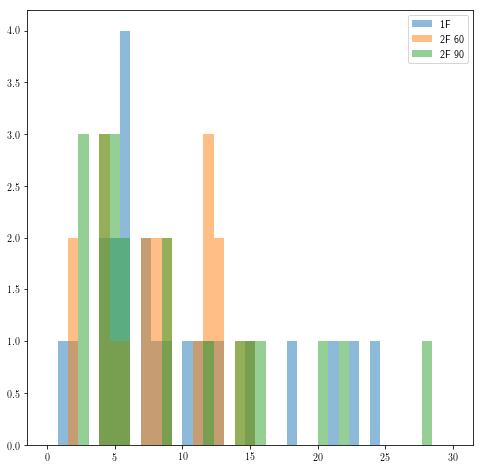

In [30]:
n_bins = int(40)

fly_reversal_counts = np.zeros((3,25))
plt.figure(figsize=(8,8))
colors = ['blue','yellow','red']
labels = ['1F','2F 60','2F 90']

bins = np.linspace(0,30,n_bins)

for i,condition in enumerate(['1F_1','2F_60_2','2F_90_3']):

    k_filename = 'k_inter_rev/k_inter_'+str(condition)+'.txt'    
    empirical_ks = np.loadtxt(k_filename)#, header=None, usecols=[0,1]).values.T[0]
    #the imported array empirical_ks has shape flies x 30, ( = up to 30 reversal k values)
    fly_count = np.shape(empirical_ks)[0]
    nan_empirical_ks = np.copy(empirical_ks)
    nan_empirical_ks[nan_empirical_ks<0.01] = np.nan
    reversal_counts = np.sum(~np.isnan(nan_empirical_ks),axis=1)
    fly_reversal_counts[i,:len(reversal_counts)] = reversal_counts
    plt.hist(reversal_counts,bins=bins,label=labels[i],alpha=0.5)

plt.legend()

    
    

    

[1. 1. 1.]


Text(0.5, 1.0, 'Number of ki (Number of Reversals After 1st Reversal)')

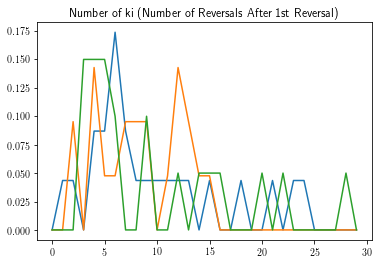

In [31]:
def reversal_count_dist(n_bins):

    reversal_count_bins = np.arange(0,31,1)
    reversal_count_probs = np.zeros((3,30))

    for i,condition in enumerate(['1F_1','2F_60_2','2F_90_3']):

        k_filename = 'k_inter_rev/k_inter_'+str(condition)+'.txt'    
        empirical_ks = np.loadtxt(k_filename)#, header=None, usecols=[0,1]).values.T[0]
        #the imported array empirical_ks has shape flies x 30, ( = up to 30 reversal k values)
        fly_count = np.shape(empirical_ks)[0]
        nan_empirical_ks = np.copy(empirical_ks)
        nan_empirical_ks[nan_empirical_ks<0.01] = np.nan
        reversal_count_vals = np.sum(~np.isnan(nan_empirical_ks),axis=1)
        reversal_count_ns,_ = np.histogram(reversal_count_vals,bins=reversal_count_bins)
        reversal_count_probs[i,:30] = reversal_count_ns/np.sum(reversal_count_ns)
        
        
    #reversal_counts is the same for every condition
    #reversal_count_probs is different for each condition    
    
    return reversal_count_bins,reversal_count_probs

reversal_count_bins,reversal_count_probs = reversal_count_dist(30)
print(np.sum(reversal_count_probs,axis=1))
plt.figure()
plt.plot(reversal_count_bins[:-1],reversal_count_probs[0,:])
plt.plot(reversal_count_bins[:-1],reversal_count_probs[1,:])
plt.plot(reversal_count_bins[:-1],reversal_count_probs[2,:])
plt.title('Number of ki (Number of Reversals After 1st Reversal)')

## Trace Generation w/ Two-Part Reversal Distance Model

Below: we generate a single straight line trace according to the 
inter-reversal distance relationship:

$r_{1} = r_{0}+c_k, k \in \{1,2,3\}$

$r_{i} = kr_{i-1}, i>1$


In [32]:
def g(m,logN,c,condition,n_bins=40,r_0=50,food1_loc=-15,velocity=10,t_stop=4.):
    
    #Make the trace
    num_segments = 70


    #Add in the information on the emprical k distribution

    k_vals,k_probs = get_k_hist(logN,n_bins)
    k_probs_cond = k_probs[condition-1,:]

    reversal_count_bins,reversal_count_probs = reversal_count_dist(n_bins)
   
    n_ki_draw = int(np.random.choice(reversal_count_bins[:-1],p=reversal_count_probs[condition-1,:]))

    k_vals_draw = np.random.choice(k_vals[:-1],p=k_probs_cond,size=n_ki_draw) #empirical k distribution
    #     k_vals_draw = np.random.normal(1,0.2,num_segments) #temporary: normal distribution
    
    r_0 = np.radians(r_0)
    velocity = np.radians(velocity)
    food1_loc = np.radians(food1_loc)
#     condition = int(condition)
   

    #We're plotting the relevant crossing lines for a single transit bin,
    #the bin whose lower edge is given by theta_0.
    

    
    #Add in the information on the emprical c distribution
    cbins,c_probs = get_c_hist(m,logN,n_bins)


    #cbins 
    #(len =  num_c_bin_vals)
    #the possible c values as computed above in the r1-r0 histogram. 
    #for simplicity's sake, 
    #just use the same set/ the same range for each trial condition):
    #c_probs
    #(shape = 3 x num_c_bin_vals)
    #each row is the normalized frequency (= probability) of each c value for that condition
   
    
#     c = np.radians(np.random.choice(c_vals,p=c_probs[condition,:]))

    #For this case, we tell it what c we want directly -- next up, draw from the distribution
    c = np.radians(c)
#     print(c)
    ird0 = r_0+c #This is r1 (k=1)
    irds = np.zeros(len(k_vals_draw)+1)
    irds[0] = ird0
     

    

    for i in range(len(k_vals_draw)):
        
        irds[i+1] = k_vals_draw[i]*irds[i]
  
    trace = trace_objects.DistanceListTrace(
            food1_loc,irds,r_0,t_stop=t_stop,
                velocity=velocity,num_transit_ticks=n_bins)
    
    transit_tick_interval = 2*np.pi/n_bins
    
    x = trace.t
    y = trace.path
    
    fig = plt.figure(1,figsize=(12,12))#,dpi=200)
        
    gs = matplotlib.gridspec.GridSpec(4,4)

    ax1 = fig.add_subplot(gs[0:2,0:2])
   
    plt.title('C value inputted: '+str(np.degrees(c))[0:3])
    plt.plot(x,y,'o',color='grey',markersize=1,zorder=1)
    plt.rc('text', usetex=True)
    plt.xlabel('Time (min)')
   

    num_ytick_labels = 5
    yticks = np.linspace(-np.pi,np.pi,num_ytick_labels)
    plt.yticks(yticks)
    y_ticklabels = '$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$'
    ax1.set_yticklabels(y_ticklabels,fontsize=15)
  
    plt.ylim([-np.pi,np.pi])
    
    reversals_inds,reversals_bin_counts = trace.find_reversals_peaks()
    reversals_inds,reversals_bin_counts = trace.find_reversal_inds()

    plt.scatter(x[reversals_inds],y[reversals_inds],color='b',zorder=2)
    
    #Plot the projections of the reversals onto the right y axis
    
    left_dots = np.vstack((x[reversals_inds],y[reversals_inds]))
    right_dots = np.vstack((t_stop*np.ones_like(x[reversals_inds]),y[reversals_inds]))
    #shape outer_dots is (2,num_spots)
    whole = np.stack((left_dots,right_dots))
    #shape whole is (2,2,num_spots)
    plt.plot(whole[:,0,:],whole[:,1,:],color='pink',zorder=0);
    #The main takeaway is to make one big array whose dimensions are
    #2 (inner vs outer ) by
    #2 (x and y) by
    #num angles
    
    ax2 = fig.add_subplot(gs[0:2,2:4])# plt.subplot(222)
    y = trace.location_bins_rads
    ax2.barh(y[:-1],reversals_bin_counts,height=(2*np.pi/n_bins),align='edge',
             color='r',
             label='reversals')
    ax2.set_yticks(y)
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
#         left=False,      # ticks along the bottom edge are off
        labelleft=False) # labels along the bottom edge are off
    
    plt.title('Reversal Counts')
    
    plt.ylim([-np.pi,np.pi])
    
    x_locs = -0.05*np.ones(num_ytick_labels);y_locs = np.linspace(0.,1.,num_ytick_labels)
    for x_loc,y_loc,label in zip(x_locs,y_locs,y_ticklabels):
        ax2.text(x_loc,y_loc,label,transform=ax2.transAxes,
                 horizontalalignment='right',fontsize=15)
        
    
#     for i,label in enumerate(ax2.yaxis.get_ticklabels()):
#         if i%5>0:
#             label.set_visible(False)
    
#     print('bin vals:\n'+str(y[:-1][reversals_bin_counts>0]))

    #plt.legend()

  #  print(np.sum(reversals_bin_counts),len(reversals_inds))
    
    ax3 = fig.add_subplot(gs[2:4,0:2],polar=True)#plt.subplot(223,polar=True)
#   path = np.interp(trace.t, trace.reversal_times, trace.reversal_thetas[:-1])
    plt.plot(trace.path,trace.t)
    ax3.set_theta_zero_location('S', offset=0)
    tick_degree_values = np.linspace(0,360-(360/n_bins),n_bins)
    ax3.set_xticks(np.radians(tick_degree_values))
    pt1 =  np.linspace(0,180-(360/n_bins),n_bins/2).astype(int)
    pt2 =  np.linspace(-180,0-(360/n_bins),n_bins/2).astype(int)
    ax3.set_xticklabels(np.hstack((pt1,pt2)))
    
    ax3.set_yticklabels([])
    
    ###----------C Distributions----------
    
    alpha=0.2
    colors = ['blue','orange','red']

    ax4 = fig.add_subplot(gs[2:3,2:4])# plt.subplot(224)
    plt.title('C Distributions')
    plt.xticks(np.linspace(0,180,7))
      
#     n,_,_=plt.hist(c_probs[0,:],bins=cbins,label='1F',alpha=alpha,color=colors[0])
#     n,_,_=plt.hist(c_probs[0,:],bins=cbins,label='2F60',alpha=alpha,color=colors[0])
#     n,_,_=plt.hist(c_probs[0,:],bins=cbins,label='2F90',alpha=alpha,color=colors[0])
    
    plt.step(cbins,zero_insert(c_probs[0,:]),color=colors[0],label='1F')
    plt.step(cbins,zero_insert(c_probs[1,:]),color=colors[1],label='2F60')
    plt.step(cbins,zero_insert(c_probs[2,:]),color=colors[2],label='2F90')
  
    a = ax4.get_ylim()[1]
    plt.plot(np.array([np.degrees(c),np.degrees(c)]),np.array([0,a]),label='Drawn value of c',color='k')
    plt.legend()
   
    ###----------K Distributions----------

    ax4 = fig.add_subplot(gs[3:4,2:4])# plt.subplot(224)
    plt.title('K Distributions')
    plt.xticks(np.linspace(0,3,7))
      
#     n,_,_=plt.hist(c_probs[0,:],bins=cbins,label='1F',alpha=alpha,color=colors[0])
#     n,_,_=plt.hist(c_probs[0,:],bins=cbins,label='2F60',alpha=alpha,color=colors[0])
#     n,_,_=plt.hist(c_probs[0,:],bins=cbins,label='2F90',alpha=alpha,color=colors[0])
    
    
    plt.step(k_vals,zero_insert(k_probs[0,:]),color=colors[0],label='1F',alpha=(0.2+(0.6)*int(condition==1)))
    plt.step(k_vals,zero_insert(k_probs[1,:]),color=colors[1],label='2F60',alpha=(0.2+(0.6)*int(condition==2)))
    plt.step(k_vals,zero_insert(k_probs[2,:]),color=colors[2],label='2F90',alpha=(0.2+(0.6)*int(condition==3)))
    plt.legend()
    
      
n_bins_init = 50
sn_bins =  slider('n_bins',5,100,5,n_bins_init)

k_mean_init =  1. 
sk_mean =  slider('k_mean',.9,1.2,0.01,k_mean_init)


r_0_init = -50.
sr_0 = slider('r_0',10.,90.,5.,r_0_init)
velocity_init = 5.
svelocity = slider('velocity',0.,20.,.1,velocity_init)
t_stop_init = 2.
st_stop = slider('t_stop',0.,5.,.1,t_stop_init)
food1_loc_init = -30.
sfood1_loc = slider('food1_loc',-90.,90,10.,food1_loc_init)
sm =  slider('m',1,23,1,8)
slog_N =  slider('logN',3,10,1,8)
condition_toggle = widgets.RadioButtons(options=[('1F',1), ('2F 60',2),
                                          ('2F 90',3)],disabled=False,description='condition')     
sc =  slider('c',10,180,10,40)

sliders = [sn_bins,sr_0,svelocity,st_stop,sfood1_loc,sm,slog_N,sc,condition_toggle]#,sk_mean]#

items = [Box([slider]) for slider in sliders]
#         [snum_transit_ticks]),Box([sk_mean])]
  

ui = Box(items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='30%'
))

slider_names = [slider.description for slider in sliders]
param_dict =  dict(zip(slider_names,sliders))

# #Add in the information on the emprical k distribution

# k_vals,k_probs = get_k_hist(logN,n_bins)

# param_dict.insert({'k_vals':k_vals,'k_probs':k_probs})


# #Add in the information on the emprical c distribution

# c_vals,c_probs = get_c_hist(m,logN,n_bins)

# param_dict.insert({'c_vals':c_vals,'c_probs':c_probs})

out = widgets.interactive_output(g, param_dict)

def reset_values(b):
    """Reset slider values"""
    sk_mean.set_trait('value',k_mean_init)
    snum_transit_ticks.set_trait('value',k_mean_init)
    out.children[0].value = 1
    out.children[1].value = 1
    
    
reset_button = widgets.Button(description = "Reset")
reset_button.on_click(reset_values)


display(ui,reset_button,out)



# my_plts = widgets.interactive(pltsin, f1 = (1, 2, 0.01), f2 = (1, 2, 0.01))
# display(my_plts, reset_button)

Box(children=(Box(children=(FloatSlider(value=50.0, continuous_update=False, description='n_bins', min=5.0, re…

Button(description='Reset', style=ButtonStyle())

Output()

Now, do a modified version of the above in which we draw N times (N traces), where each trace is a sample from the distribution of c values for the condition. 

In [35]:
def g(m,logN,logM,condition,n_bins=40,r_0=50,food1_loc=-15,velocity=10,t_stop=4.):
    
    #Make the trace
    num_segments = 70
    n_time_points = int(t_stop*60*30)

    n_bins = int(n_bins)
    m = int(m)     #subsample size out of all the flies in the condition
    N = int(np.exp(logN)) #bootstrapping sample size used to determine the c histogram
    M = int(np.exp(logM))

    cbins,c_probs = get_c_hist(m,logN,n_bins)
    
    cbins_rads = np.radians(cbins)
    
    #For each of the N traces, draw a set of k_is, i>=1, count of which is empirically informed.
    k_vals_by_trace = np.zeros((M,30))
    reversal_bin_count_array = np.zeros((M,n_bins-1))
    c_draws = np.zeros(M)
    
    reversal_count_bins,reversal_count_probs = reversal_count_dist(n_bins)
    k_vals,k_probs = get_k_hist(logN,n_bins)
    k_probs_cond = k_probs[condition-1,:]
    r_0 = np.radians(r_0)
    velocity = np.radians(velocity)
    food1_loc = np.radians(food1_loc)
    

    
    for i in range(M):
        n_ki_draw = int(np.random.choice(reversal_count_bins[:-1],p=reversal_count_probs[condition-1,:]))
        k_vals_draw = np.random.choice(k_vals[:-1],p=k_probs_cond,size=n_ki_draw) #empirical k distribution
        k_vals_by_trace[i,len(k_vals_draw)]
        #Draw a c for the trace
        c = np.random.choice(cbins_rads[:-1],p=c_probs[condition-1,:])
        r1 = r_0+c #This is r1
        irds = np.zeros(n_ki_draw)
        irds[0] = r1
        for j in range(1,len(irds)):
            irds[j] = ks[j-1]*irds[j-1]
        trace = trace_objects.DistanceListTrace(
                food1_loc,irds,r_0,t_stop=t_stop,
                    velocity=velocity,num_transit_ticks=n_bins,n_points=n_time_points)
        reversals_inds,reversals_bin_counts = trace.find_reversal_inds()
        reversal_bin_count_array[i,:] = reversals_bin_counts
        c_draws[i] = c

        
    transit_tick_interval = 2*np.pi/n_bins
    
    x = trace.t
    y = trace.path
    
    fig = plt.figure(1,figsize=(12,12))#,dpi=200)
        
    gs = matplotlib.gridspec.GridSpec(4,4)

    ax1 = fig.add_subplot(gs[0:2,0:2])
   
    plt.plot(x,y,'o',color='grey',markersize=1,zorder=1)
    plt.rc('text', usetex=True)
    plt.xlabel('Time (min)')
   

    num_ytick_labels = 5
    yticks = np.linspace(-np.pi,np.pi,num_ytick_labels)
    plt.yticks(yticks)
    y_ticklabels = '$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$'
    ax1.set_yticklabels(y_ticklabels,fontsize=15)
  
    plt.ylim([-np.pi,np.pi])
    
#    reversals_inds,reversals_bin_counts = trace.find_reversals_peaks()
 
    plt.scatter(x[reversals_inds],y[reversals_inds],color='b',zorder=2)
    
    #Plot the projections of the reversals onto the right y axis
    
    left_dots = np.vstack((x[reversals_inds],y[reversals_inds]))
    right_dots = np.vstack((t_stop*np.ones_like(x[reversals_inds]),y[reversals_inds]))
    #shape outer_dots is (2,num_spots)
    whole = np.stack((left_dots,right_dots))
    #shape whole is (2,2,num_spots)
    plt.plot(whole[:,0,:],whole[:,1,:],color='pink',zorder=0);
    #The main takeaway is to make one big array whose dimensions are
    #2 (inner vs outer ) by
    #2 (x and y) by
    #num angles
    
    ax2 = fig.add_subplot(gs[0:2,2:4])# plt.subplot(222)
    y = trace.location_bins_rads
     
    bar_values = np.sum(reversal_bin_count_array,axis=0)
    #for j in range(M):
    #    ax2.scatter(reversal_bin_count_array[j,:],y[:-1],color='r',alpha=0.2)
    #    ax2.set_yticks(y)
    bin_width=y[1]-y[0]
    ax2.barh(y[:-1],bar_values,height=bin_width)
    
    
    
    
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
#         left=False,      # ticks along the bottom edge are off
        labelleft=False) # labels along the bottom edge are off
    
    plt.title('Reversal Counts')
    
    plt.ylim([-np.pi,np.pi])
    
    x_locs = -0.05*np.ones(num_ytick_labels);y_locs = np.linspace(0.,1.,num_ytick_labels)
    for x_loc,y_loc,label in zip(x_locs,y_locs,y_ticklabels):
        ax2.text(x_loc,y_loc,label,transform=ax2.transAxes,
                 horizontalalignment='right',fontsize=15)
        

    ax3 = fig.add_subplot(gs[2:4,0:2],polar=True)#plt.subplot(223,polar=True)
#   path = np.interp(trace.t, trace.reversal_times, trace.reversal_thetas[:-1])
    plt.plot(trace.path,trace.t)
    ax3.set_theta_zero_location('S', offset=0)
    tick_degree_values = np.linspace(0,360-(360/n_bins),n_bins)
    ax3.set_xticks(np.radians(tick_degree_values))
    pt1 =  np.linspace(0,180-(360/n_bins),n_bins/2).astype(int)
    pt2 =  np.linspace(-180,0-(360/n_bins),n_bins/2).astype(int)
    ax3.set_xticklabels(np.hstack((pt1,pt2)))
    
    ax3.set_yticklabels([])
    
    ###----------C Distributions----------
    
    alpha=0.2
    colors = ['blue','orange','red']

    ax4 = fig.add_subplot(gs[2:3,2:4])# plt.subplot(224)
    plt.title('C Distributions')
    plt.xticks(np.linspace(0,180,7))
 
    n,_ = np.histogram(np.degrees(c_draws),bins=cbins,)
    plt.bar(cbins[:-1],n/np.sum(n),alpha=alpha,color=colors[condition-1],align='edge')
    
    plt.step(cbins,zero_insert(c_probs[0,:]),color=colors[0],label='1F')
    plt.step(cbins,zero_insert(c_probs[1,:]),color=colors[1],label='2F60')
    plt.step(cbins,zero_insert(c_probs[2,:]),color=colors[2],label='2F90')

   
    ###----------K Distributions----------

    ax4 = fig.add_subplot(gs[3:4,2:4])# plt.subplot(224)
    plt.title('K Distributions')
    plt.xticks(np.linspace(0,3,7))
      
#     n,_,_=plt.hist(c_probs[0,:],bins=cbins,label='1F',alpha=alpha,color=colors[0])
#     n,_,_=plt.hist(c_probs[0,:],bins=cbins,label='2F60',alpha=alpha,color=colors[0])
#     n,_,_=plt.hist(c_probs[0,:],bins=cbins,label='2F90',alpha=alpha,color=colors[0])
    
    
    plt.step(k_vals,zero_insert(k_probs[0,:]),color=colors[0],label='1F',alpha=(0.2+(0.6)*int(condition==1)))
    plt.step(k_vals,zero_insert(k_probs[1,:]),color=colors[1],label='2F60',alpha=(0.2+(0.6)*int(condition==2)))
    plt.step(k_vals,zero_insert(k_probs[2,:]),color=colors[2],label='2F90',alpha=(0.2+(0.6)*int(condition==3)))
    plt.legend()
    
      
n_bins_init = 50
sn_bins =  slider('n_bins',5,100,5,n_bins_init)

k_mean_init =  1. 
sk_mean =  slider('k_mean',.9,1.2,0.01,k_mean_init)


r_0_init = -50.
sr_0 = slider('r_0',10.,90.,5.,r_0_init)
velocity_init = 5.
svelocity = slider('velocity',0.,20.,.1,velocity_init)
t_stop_init = 4.
st_stop = slider('t_stop',0.,10.,.1,t_stop_init)
food1_loc_init = -30.
sfood1_loc = slider('food1_loc',-90.,90,10.,food1_loc_init)
sm =  slider('m',1,23,1,8)
slog_N =  slider('logN',3,10,1,8)
slog_M =  slider('logM',3,9,1,3)
condition_toggle = widgets.RadioButtons(options=[('1F',1), ('2F 60',2),
                                          ('2F 90',3)],disabled=False,description='condition')     
sc =  slider('c',10,180,10,40)

sliders = [sn_bins,sr_0,svelocity,st_stop,sfood1_loc,sm,slog_N,slog_M,condition_toggle]#sc,]#,sk_mean]#

items = [Box([slider]) for slider in sliders]
#         [snum_transit_ticks]),Box([sk_mean])]
  

ui = Box(items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='30%'
))

slider_names = [slider.description for slider in sliders]
param_dict =  dict(zip(slider_names,sliders))

# #Add in the information on the emprical k distribution

# k_vals,k_probs = get_k_hist(logN,n_bins)

# param_dict.insert({'k_vals':k_vals,'k_probs':k_probs})


# #Add in the information on the emprical c distribution

# c_vals,c_probs = get_c_hist(m,logN,n_bins)

# param_dict.insert({'c_vals':c_vals,'c_probs':c_probs})

out = widgets.interactive_output(g, param_dict)

def reset_values(b):
    """Reset slider values"""
    sk_mean.set_trait('value',k_mean_init)
    snum_transit_ticks.set_trait('value',k_mean_init)
    out.children[0].value = 1
    out.children[1].value = 1
    
    
reset_button = widgets.Button(description = "Reset")
reset_button.on_click(reset_values)


display(ui,reset_button,out)



# my_plts = widgets.interactive(pltsin, f1 = (1, 2, 0.01), f2 = (1, 2, 0.01))
# display(my_plts, reset_button)

Box(children=(Box(children=(FloatSlider(value=50.0, continuous_update=False, description='n_bins', min=5.0, re…

Button(description='Reset', style=ButtonStyle())

Output()

The below is an attempt to implement Amir's idea for the superposition two-food model.

## Single Trace, One Parameter

Below: we generate a single straight line trace according to the 
inter-reversal distance relationship:
$$r_{i} = kr_{i-1}$$

In [34]:
def g(k_mean,n_bins=40,r_0=50,food1_loc=-15,velocity=10,t_stop=4.):
   
    r_0 = np.radians(r_0)
    velocity = np.radians(velocity)
    food1_loc = np.radians(food1_loc)

    #We're plotting the relevant crossing lines for a single transit bin,
    #the bin whose lower edge is given by theta_0.
    
    #Make the trace
    num_segments = 70

    ks = np.random.normal(k_mean,0.2,num_segments)

    ird0 = np.radians(70)
    irds = np.zeros_like(ks)
    irds[0] = ird0

    for i in range(1,len(ks)):
        irds[i] = ks[i-1]*irds[i-1]



    trace = trace_objects.DistanceListTrace(
            food1_loc,irds,r_0,t_stop=t_stop,
                velocity=velocity,num_transit_ticks=n_bins)
    
    
    transit_tick_interval = 2*np.pi/n_bins
    
    x = trace.t
    y = trace.path
    
    fig = plt.figure(1,figsize=(15,15))#,dpi=200)
    ax1 = plt.subplot(221)
   

    plt.plot(x,y,'o',color='grey',markersize=1,zorder=1)
    plt.rc('text', usetex=True)
    plt.xlabel('Time (min)')
   

    num_ytick_labels = 5
    yticks = np.linspace(-np.pi,np.pi,num_ytick_labels)
    plt.yticks(yticks)
    y_ticklabels = '$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$'
    ax1.set_yticklabels(y_ticklabels,fontsize=15)

    
    plt.ylim([-np.pi,np.pi])
    
    reversals_inds,reversals_bin_counts = trace.find_reversals_peaks()
    reversals_inds,reversals_bin_counts = trace.find_reversal_inds()

    plt.scatter(x[reversals_inds],y[reversals_inds],color='b',zorder=2)
    
    #Plot the projections of the reversals onto the right y axis
    
    left_dots = np.vstack((x[reversals_inds],y[reversals_inds]))
    right_dots = np.vstack((t_stop*np.ones_like(x[reversals_inds]),y[reversals_inds]))
    #shape outer_dots is (2,num_spots)
    whole = np.stack((left_dots,right_dots))
    #shape whole is (2,2,num_spots)
    plt.plot(whole[:,0,:],whole[:,1,:],color='pink',zorder=0);
    #The main takeaway is to make one big array whose dimensions are
    #2 (inner vs outer ) by
    #2 (x and y) by
    #num angles
    
#     print((180./num_transit_ticks))
    
    ax2 = plt.subplot(222)
    y = trace.location_bins_rads
    ax2.barh(y[:-1],reversals_bin_counts,height=(2*np.pi/n_bins),align='edge',
             color='r',
             label='reversals')
    ax2.set_yticks(y)
#     ax2.set_yticklabels(np.round(np.degrees(y),0).astype(int))
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
#         left=False,      # ticks along the bottom edge are off
        labelleft=False) # labels along the bottom edge are off
    
    plt.title('Reversal Counts')
    
    plt.ylim([-np.pi,np.pi])
    
    x_locs = -0.05*np.ones(num_ytick_labels);y_locs = np.linspace(0.,1.,num_ytick_labels)
    for x_loc,y_loc,label in zip(x_locs,y_locs,y_ticklabels):
        ax2.text(x_loc,y_loc,label,transform=ax2.transAxes,
                 horizontalalignment='right',fontsize=15)
        
    
#     for i,label in enumerate(ax2.yaxis.get_ticklabels()):
#         if i%5>0:
#             label.set_visible(False)
    
#     print('bin vals:\n'+str(y[:-1][reversals_bin_counts>0]))

    #plt.legend()

  #  print(np.sum(reversals_bin_counts),len(reversals_inds))
    
    ax4 = plt.subplot(223,polar=True)
#   path = np.interp(trace.t, trace.reversal_times, trace.reversal_thetas[:-1])
    plt.plot(trace.path,trace.t)
    ax4.set_theta_zero_location('S', offset=0)
    tick_degree_values = np.linspace(0,360-(360/n_bins),n_bins)
    ax4.set_xticks(np.radians(tick_degree_values))
    pt1 =  np.linspace(0,180-(360/n_bins),n_bins/2).astype(int)
    pt2 =  np.linspace(-180,0-(360/n_bins),n_bins/2).astype(int)
    xticklabels=ax4.set_xticklabels(np.hstack((pt1,pt2)))
    
    ax4.set_yticklabels([])
    
    
#     plt.xticks(np.linspace(np.pi/2,2*np.pi,4),y_ticklabels)
#

    

    
n_bins_init = 24
sn_bins = slider('n_bins',0,50,2,n_bins_init)

k_mean_init =  1. 
sk_mean =  slider('k_mean',.9,1.2,0.01,k_mean_init)


r_0_init = -50.
sr_0 = slider('r_0',10.,90.,5.,r_0_init)
velocity_init = 5.
svelocity = slider('velocity',0.,20.,.1,velocity_init)
t_stop_init = 4.
st_stop = slider('t_stop',0.,10.,.1,t_stop_init)
food1_loc_init = -30.
sfood1_loc = slider('food1_loc',-90.,90,10.,food1_loc_init)

sliders = [sk_mean,sn_bins,sr_0,svelocity,st_stop,sfood1_loc]

items = [Box([slider]) for slider in sliders]
#         [snum_transit_ticks]),Box([sk_mean])]
  

ui = Box(items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))

slider_names = [slider.description for slider in sliders]
param_dict =  dict(zip(slider_names,sliders))

out = widgets.interactive_output(g, param_dict)

def reset_values(b):
    """Reset slider values"""
    sk_mean.set_trait('value',k_mean_init)
    snum_transit_ticks
    
reset_button = widgets.Button(description = "Reset")
reset_button.on_click(reset_values)


display(ui,reset_button,out)



# my_plts = widgets.interactive(pltsin, f1 = (1, 2, 0.01), f2 = (1, 2, 0.01))
# display(my_plts, reset_button)def g(k_mean,num_transit_ticks=40):
    
    #We're plotting the relevant crossing lines for a single transit bin,
    #the bin whose lower edge is given by theta_0.
    
    #Make the trace
#    num_segments = 70

    ks = np.random.normal(k_mean,0.2,num_segments)

    ird0 = np.radians(70)
    irds = np.zeros_like(ks)
    irds[0] = ird0

    for i in range(1,len(ks)):
        irds[i] = ks[i-1]*irds[i-1]

    r_0 = np.radians(50)
    velocity = np.radians(10)
    T1 = 2
    T2 = 2
    last_food_loc = 0.#np.radians(-10)

    food_case = 2
    k_std = 0.#0.1
    eps_mean = np.radians(40) 
    eps_std = np.radians(10)
    s = 0 #origin
    
    trace = trace_objects.Model4Trace(food_case,s,r_0,k_std,eps_mean,eps_std,
                                      velocity=velocity)
    
    
    transit_tick_interval = 2*np.pi/num_transit_ticks
    
    x = trace.t
    y = trace.path
    
    fig = plt.figure(1,figsize=(15,15))#,dpi=200)
  #  ax1 = plt.subplot(311,polar=True)
   

   # plt.plot(y,x,color='grey',markersize=1,zorder=1)
    #plt.rc('text', usetex=True)
    
    
    #Plot cyan dots for the reversal points
   # reversal_inds = trace.find_reversal_inds()
    #plt.plot((y%(2*np.pi))[reversal_inds],x[reversal_inds],'o',color='k',zorder=2)
    
   # plt.yticks([])
    
  #  ax1 = plt.subplot(312)
   

#    plt.plot(x,np.degrees(y),'o',color='grey',markersize=1,zorder=1)
#    plt.plot(x,np.degrees(s)*np.ones_like(x),label='s')
#    plt.plot(x,np.degrees(s+trace.d)*np.ones_like(x),label='s+d')
#    plt.legend()
#    plt.ylim([-180,180.])

   # plt.rc('text', usetex=True)
   # reversal_inds = trace.find_reversal_inds()
   # plt.plot((y%(2*np.pi))[reversal_inds],x[reversal_inds],'o',color='k',zorder=2)
   
        
    path = np.interp(trace.t, trace.reversal_times, trace.reversal_thetas[:-1])

    ax1 = plt.subplot(311)
    plt.plot(trace.t,path)
    plt.yticks([])
  

    ax2 = plt.subplot(312,polar=True)
    plt.plot(path,trace.t)


    thetas = [s,s]
    ts = [0,max(trace.t)]
    
    plt.plot(thetas,ts)
    
    thetas = [s+trace.d,s+trace.d] 
    plt.plot(thetas,ts)

    
    plt.yticks([])
    
    
    ax3 = plt.subplot(313)
    plt.plot(trace.reversal_thetas)
    plt.plot(s*np.ones_like(trace.reversal_thetas))
    plt.plot((s+trace.d)*np.ones_like(trace.reversal_thetas))
    plt.ylim([-np.pi,np.pi])
    
    

    
sk_mean =  slider('k_mean',.9,1.2,0.01,1.)

snum_transit_ticks = slider('num_transit_ticks',0,50,1,24)


items = [Box([snum_transit_ticks]),Box([sk_mean])]
  

ui = Box(items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))


param_dict =  {'k_mean':sk_mean,'num_transit_ticks': snum_transit_ticks}

out = widgets.interactive_output(g, param_dict)
display(ui, out)

IndentationError: unexpected indent (<ipython-input-34-78cf4b7bf58a>, line 181)